# EE 298 Deep Learning Assignment
Build a classifier on CIFAR10 using:  
a) MLP  
b) CNN  
Then compare the performance of both networks.

## Import modules and load the dataset

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers, initializers

# Load CIFAR10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Compute the number of labels
num_labels = len(np.unique(y_train))
print(f"Number of labels: {num_labels}")

Number of labels: 10


## Data Pre-processing

In [2]:
y_train = to_categorical(y_train, num_labels)
y_test = to_categorical(y_test, num_labels)

In [3]:
# image dimensions (assumed square)
channel = 3
x_size, y_size = x_train.shape[1], x_train.shape[2]
input_shape = (x_size, y_size, channel)

# resize and normalize
x_train = np.reshape(x_train,[-1, x_size, y_size, channel])
x_test = np.reshape(x_test,[-1, x_size, y_size, channel])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

## CNN
### Model

In [4]:
kernel_regularizer = None
kernel_initializer = 'glorot_uniform'
activity_regularizer = regularizers.l2(1e-5)
bias_regularizer=regularizers.l2(1e-5)

kernel_size = 3
dilation = 1
right_inputs = Input(shape=input_shape)
y = right_inputs
depth = 2

for i in range(depth):
  y = Conv2D(filters=32,
            kernel_size=5,
            activation='relu',
            dilation_rate=dilation,
            kernel_regularizer=kernel_regularizer,
            kernel_initializer=kernel_initializer,
            activity_regularizer=activity_regularizer,
            bias_regularizer=bias_regularizer,
            padding='same')(y)
  if i < (depth - 1):
    y = MaxPooling2D()(y)

for i in range(depth):
  y = Conv2D(filters=64,
            kernel_size=kernel_size,
            activation='relu',
            dilation_rate=dilation,
            kernel_regularizer=kernel_regularizer,
            kernel_initializer=kernel_initializer,
            activity_regularizer=activity_regularizer,
            bias_regularizer=bias_regularizer,
            padding='same')(y)
  if i < (depth - 1):
    y = MaxPooling2D()(y)

for i in range(depth):
  y = Conv2D(filters=128,
            kernel_size=kernel_size,
            activation='relu',
            dilation_rate=dilation,
            kernel_regularizer=kernel_regularizer,
            kernel_initializer=kernel_initializer,
            activity_regularizer=activity_regularizer,
            bias_regularizer=bias_regularizer,
            padding='same')(y)
  if i < (depth - 1):
    y = MaxPooling2D()(y)

In [5]:
y = Flatten()(y)
y = Dense(128, activation='relu')(y)
outputs = Dense(num_labels,
                activation='softmax')(y)
model = Model(inputs=right_inputs,
              outputs=outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)         

### Training and Evaluation
#### Hyperparameters

In [6]:
batch_size = 128
epochs = 50
learning_rate = 0.01
momentum = 0.9

In [7]:
opt = SGD(learning_rate=learning_rate, momentum=momentum)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train,
                    y_train, 
                    validation_data=(x_test, y_test),
                    epochs=epochs,
                    batch_size=batch_size)

loss, acc = model.evaluate(x_test, y_test,
                           batch_size=batch_size)
print(f"Test Accuracy: {acc * 100.0}")

Epoch 1/50
391/391 [==============================] - 282s 722ms/step - loss: 1.9597 - accuracy: 0.2759 - val_loss: 1.6057 - val_accuracy: 0.4119
Epoch 2/50
391/391 [==============================] - 276s 707ms/step - loss: 1.4931 - accuracy: 0.4591 - val_loss: 1.3287 - val_accuracy: 0.5241
Epoch 3/50
391/391 [==============================] - 281s 718ms/step - loss: 1.2848 - accuracy: 0.5492 - val_loss: 1.1913 - val_accuracy: 0.5873
Epoch 4/50
391/391 [==============================] - 283s 723ms/step - loss: 1.1129 - accuracy: 0.6128 - val_loss: 1.0485 - val_accuracy: 0.6386
Epoch 5/50
391/391 [==============================] - 280s 715ms/step - loss: 0.9762 - accuracy: 0.6654 - val_loss: 1.0479 - val_accuracy: 0.6439
Epoch 6/50
391/391 [==============================] - 280s 715ms/step - loss: 0.8751 - accuracy: 0.7021 - val_loss: 1.0349 - val_accuracy: 0.6422
Epoch 7/50
391/391 [==============================] - 282s 720ms/step - loss: 0.7917 - accuracy: 0.7332 - val_loss: 0.8721 -

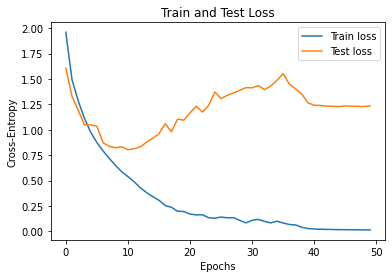

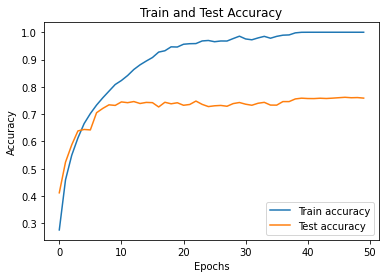

In [9]:
import matplotlib.pyplot as plt

# Plot history: Loss and accuracy
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

# Plot history: Loss and accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()